# Activity 2.1 Linear Regression

Objective(s):

This activity aims to perform regression analysis using linear regression

Intended Learning Outcomes (ILOs):
* Demonstrate how to use python to predict the outcome using linear regression.
* Demonstrate how to use single and multiple features to predict the outcome using linear regression.




Resources:
* Jupyter Notebook
* stores_dist.csv
* real_estate_price_size_year.csv
* Ames_Housing_Sales.csv 



Procedure:

Import the libraries and the data

In [1]:
#import the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#import the stores_dist.csv data

salesDist = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\stores-dist.csv')

#check the imported data

salesDist.head()


,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


Rename the annual sales to sales and number of stores in district to stores

In [ ]:
#rename the annual sales to sales and the  number of stores in district to stores

salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})

#check the salesDist data to verify if the columns were renamed.

salesDist.head()
# the names of the 2nd and 3rd columns were indeed changed.


,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


Determine the correlation

In [ ]:
#check the correlation
salesDist.corr()


,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


Interpret the correlation.

sales and distric have a positive correlation of 0.136 which is not that strong. Their linear relationship is very weak. Stores and districts have a weak, negative correlation. 

Stores and and Sales on the other have a strong but negative coorelation. This suggests that the two variables are moving in opposite size and direction from one another. They seem to portray an inverse, linear relationship.

It seems that disctric has the least correlated with the other columns.

Drop the column with the lowest correlation and verify the dataframe if the column was deleted.

In [ ]:
#type your 
sales = salesDist.drop('district',axis=1)

sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


From the correlation coefficent data, what type of correlation did you observe between annual net sales and number of stores in the district?

Stores and and Sales on have a strong but negative coorelation. This suggests that the two variables are moving in opposite size and direction from one another. They seem to portray an inverse, linear relationship.

Create a plot to visualize the data. You will also assign stores as the independent variable $x$ and sales as the dependent variable $y$.

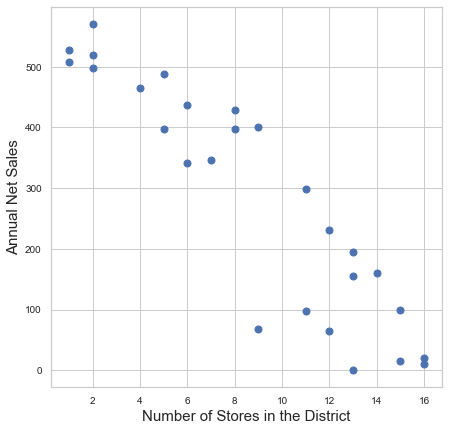

In [ ]:
# dependent variable for y axis
y = sales['sales']
# independent variable for x axis
x = sales.stores


# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(7,7))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 7)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 15)
plt.xlabel('Number of Stores in the District', fontsize = 15)
# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Display the scatter plot
plt.show()

Calculate the slope and y-intercept of the linear regression line.

In [ ]:
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is -35.79x + 599.38.


Using the linear regression line, you can predict the annual net sales based on the number of stores in the district.

In [ ]:
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [ ]:
# Enter the number of stores in the function to generate the net sales prediction.
predict(4)

456.2313681207655

# Using statsmodel to perform Multivariable Linear Regression

Import the libraries. Make sure to install all the libraries to avoid errors. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Load the data real_estate_price_size_year.csv and verify the data.

In [ ]:
data = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\real_estate_price_size_year.csv')
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


Show the descriptive statistic analysis 

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

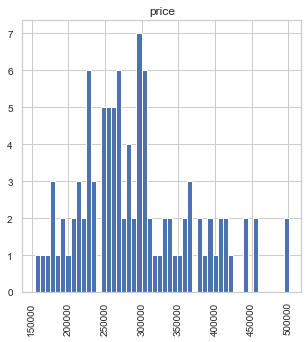

In [ ]:
data.hist(column='price',bins=50,figsize=(5,5), xlabelsize=10, ylabelsize=10, xrot=90)

In [ ]:
stats = data.describe()
stats

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [ ]:
CV_price = stats['price']['std']/stats['price']['mean']
CV_size = stats['size']['std']/stats['size']['mean']
CV_year = stats['year']['std']/stats['year']['mean']
print(CV_price)
print(CV_size)
print(CV_year)

0.2636144486578891
0.34927725458236075
0.002349707172746235


Interpret the count, mean, min and std

* the count means that there are 100 data points for this data frame
* The mean suggests that the average price of the houses is 292289.470160, the average size of the houses is 853.0242, and the average year is 2012.
* The standard deviation suggests the spread of the data around the mean. Usually Coefficient of variation is a measure of the spread of the data around the mean and can tell us whether the Std is high or low in a given data set. If CV >= 1, then we have a relatively high variation. CV < 1, suggestst that the data variation is relatively low. Since all of our CVs for all the columns are less than 1, then we can say that there is relatively low variation for the data points in each column

Calcuate the multiple linear regression. Set the dependent variable and independent variable

In [ ]:
# Following the regression equation, our dependent variable (y) is the price
y = data ['price']
# Similarly, our independent variable (x) is the size and year
x1 = data [['size','year']]

In [ ]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

In [ ]:
# provide summary of the results statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           2.77e-32
Time:                        09:38:39   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.0

Interpret the result. Explain the adjusted R squared , coef and standard error.

* The adjusted R squared is 0.772, which is a high value. This means that the model is good.
* coef column explains the relationship between the independent variable and the dependent variable. The const-coef is the y-intercept; the size-coef is the slope coefficient for the size of the house; the year-coef is the slope coefficient for the year of the house.
* the standard error essentially is the SD of the mean of the all the sample's means. it is used alongside the the coef to determine the t-value. The smaller the std error, the more precise the estimate. In this case, our std errors for const and year are really high.

### Using sklearn to perform Linear Regression

Import the data using Pandas. 
Check the data. 
Examine the data types and shape of the dataset.

In [ ]:
import pandas as pd
import numpy as np

# Import the data using the file path

data = pd.read_csv(r'C:\Users\core i5\Desktop\GitHub\DataScience\datascience\CPE 312\Linear Regression\activities\dataset\Ames_Housing_Sales.csv')

print(data.shape)

(1379, 80)


In [ ]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [ ]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [ ]:
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

categorical_cols

C:\Users\core i5\AppData\Local\Temp/ipykernel_17984/712878951.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.object


Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

215

Create a new data set where all of the above categorical features will be one-hot encoded. 

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

C:\Users\core i5\AppData\Local\Temp/ipykernel_17984/3821961622.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc[col]).astype(np.int)
C:\Users\core i5\AppData\Local\Temp/ipykernel_17984/3821961622.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use,

In [ ]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

215

In [ ]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


Create train and test splits of both data sets. To ensure the data gets split the same way, use the same random_state in each of the two splits.
For each data set, fit a basic linear regression model on the training data.
Calculate the mean squared error on both the train and test sets for the respective models

In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [ ]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,1.131507e+09,3.177282e+08
test,1.372182e+09,2.144271e+16


For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

C:\Users\core i5\AppData\Local\Temp/ipykernel_17984/3435513446.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = X_train.dtypes == np.float


not_encoded - standardscaling        1.372182e+09
not_encoded - minmaxscaling          1.372413e+09
not_encoded - maxabsscaling          1.371659e+09
one_hot_encoded - standardscaling    8.065328e+09
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - maxabsscaling      1.015855e+28
--------------------------------------------------------------------------------
not_encoded - standardscaling 1372182358.934502
not_encoded - minmaxscaling 1372412875.478745
not_encoded - maxabsscaling 1371659496.8142254
one_hot_encoded - standardscaling 8065327607.247107
one_hot_encoded - minmaxscaling 8065327607.245566
one_hot_encoded - maxabsscaling 1.015855066676121e+28


Plot predictions vs actual for one of the models.


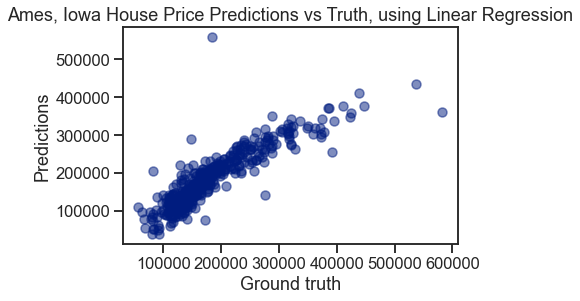

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');
plt.show()

Interpret the graph

    this model that was used that gave the linear regression equation seems to have been very good at predicting the sales. Since we can clearly see a linear realtionship between the prediction and the ground truth, we can say that the model is very good, that is the predicted value for each x_test is close to that x_test's true target value.

***

Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compute the correlation
* Use One-hot encoding in categorical features
* Apply feature scaling
* [Perform linear regression using one independent variable only using numpy](#section-1)
* [Perform linear regression using multiple independent variable using statsmodel](#section-2)
* [Perform linear regression using sklearn](#section-3)

<a id = 'section-1'></a>
### Perform linear regression using one independent variable only using numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://github.com/jrios6/Linear-Regression/blob/master/data/bmi_and_life_expectancy.csv/?raw=true")

print("shape is:", df.shape)
df.head(), df.info()

shape is: (163, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          163 non-null    object 
 1   Life expectancy  163 non-null    float64
 2   BMI              163 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(       Country  Life expectancy       BMI
 0  Afghanistan             52.8  20.62058
 1      Albania             76.8  26.44657
 2      Algeria             75.5  24.59620
 3      Andorra             84.6  27.63048
 4       Angola             56.7  22.25083,
 None)

In [ ]:
# data is clean. We need to seperate the independent variables from the dependent variables.

x = df["BMI"]
y = df["Life expectancy"]

In [ ]:
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is 2.52.
The y-intercept is 7.23.
The best fit simple linear regression line is 2.52x + 7.23.


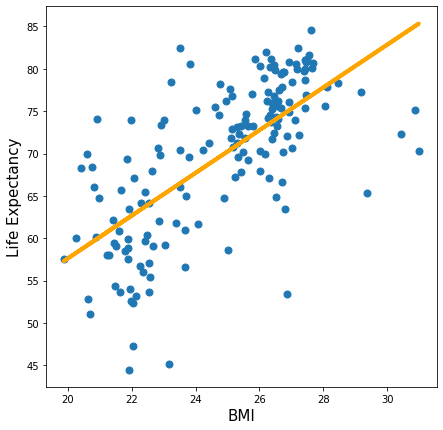

In [ ]:
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(7,7))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 7)

#add the linear regression line on the plot

yhat =  x*2.52 + 7.23
plt.plot(x,yhat, lw=4, c='orange', label='regression line')

# Add axis labels and increase the font size
plt.ylabel('Life Expectancy', fontsize = 15)
plt.xlabel('BMI', fontsize = 15)
# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Display the scatter plot
plt.show()

In [ ]:
# Function to predict the net sales from the regression line
def predict(query):
        if(query < 0):
                return "Please enter a positive number"
        predict = m * query + b
        return predict


In [ ]:
# print the Life expectancy from the regression line with the BMI as the independent variable
print(predict(30), "years in life expectancy")

82.78222150957768 years in life expectancy


### Data Preprocessing (for multiple independent variables using statsmodels)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("https://github.com/datasciencedojo/datasets/blob/f0ccab6a7ceafdff780052166fb6fab3311398eb/titanic.csv/?raw=true")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# determine thenumber of columns, datapoints, and data types
data.info()

# there are 11 number of columsn, 891 entries/datapoints, and the datatypes for all the columnns are revealed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# the name won't be a feature, so I will drop it. It cannot be used for regression.
data.drop("Name",axis = 1, inplace = True)

# I decided to just completely remove the rows with missing data. I think having 183 data points will still be a good representation of the data and will be able to be used for the analysis and regression.
data.dropna(axis =0, how = "any", inplace = True)
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Ticket       183 non-null    object 
 8   Fare         183 non-null    float64
 9   Cabin        183 non-null    object 
 10  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 17.2+ KB


(183, 11)

In [ ]:
data.drop("Ticket",axis = 1, inplace = True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S


In [ ]:
#? SHould the cabin be dropped?

In [ ]:
y = data["Fare"]
x = data.drop("Fare", axis = 1)

In [ ]:
dummy = pd.get_dummies(x, drop_first=True)
dummy

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_male,Cabin_A16,Cabin_A20,Cabin_A23,...,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
1,2,1,1,38.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,54.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,11,1,3,4.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
11,12,1,1,58.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
872,873,0,1,33.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
879,880,1,1,56.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,1,19.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#passenger ID can be discarded since it is merely like the index
dummy.drop("PassengerId", axis = 1, inplace = True)

In [ ]:
dummy.corr()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Cabin_A16,Cabin_A20,Cabin_A23,Cabin_A24,...,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
Survived,1.000000,-0.034542,-0.254085,0.106346,0.023582,-0.532418,0.051771,0.051771,0.051771,-0.106131,...,0.073417,-0.106131,-0.150506,-0.001503,0.090167,0.073417,-0.054813,-0.106131,-0.038544,-0.095861
Pclass,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.046181,-0.027593,-0.027593,-0.027593,-0.027593,...,-0.039131,0.260955,0.370065,0.203217,0.203217,0.165467,0.526266,-0.027593,-0.039131,0.238755
Age,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,0.184969,0.058562,0.063313,0.210603,-0.022209,...,-0.038233,0.030055,-0.092136,-0.180736,-0.055231,-0.223524,-0.200495,0.044308,0.019038,-0.088568
SibSp,0.106346,-0.103592,-0.156162,1.000000,0.255346,-0.104291,0.061793,0.061793,-0.053596,-0.053596,...,0.087629,-0.053596,-0.076005,0.040632,-0.093345,0.251263,0.008265,-0.053596,0.169446,0.019780
Parch,0.023582,0.047496,-0.271271,0.255346,1.000000,-0.089581,-0.046827,-0.046827,-0.046827,-0.046827,...,-0.066406,-0.046827,-0.066406,0.147176,-0.081556,0.073276,0.153865,-0.046827,-0.066406,0.088214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_F4,0.073417,0.165467,-0.223524,0.251263,0.073276,-0.004024,-0.007792,-0.007792,-0.007792,-0.007792,...,-0.011050,-0.007792,-0.011050,-0.013571,-0.013571,1.000000,-0.015714,-0.007792,-0.011050,0.079888
Cabin_G6,-0.054813,0.526266,-0.200495,0.008265,0.153865,-0.155319,-0.011081,-0.011081,-0.011081,-0.011081,...,-0.015714,-0.011081,-0.015714,-0.019299,-0.019299,-0.015714,1.000000,-0.011081,-0.015714,0.113609
Cabin_T,-0.106131,-0.027593,0.044308,-0.053596,-0.046827,0.071342,-0.005495,-0.005495,-0.005495,-0.005495,...,-0.007792,-0.005495,-0.007792,-0.009569,-0.009569,-0.007792,-0.011081,1.000000,-0.007792,0.056334
Embarked_Q,-0.038544,-0.039131,0.019038,0.169446,-0.066406,-0.004024,-0.007792,-0.007792,-0.007792,-0.007792,...,-0.011050,-0.007792,-0.011050,-0.013571,-0.013571,-0.011050,-0.015714,-0.007792,1.000000,-0.138314


<a id = 'section-2'></a>
### Linear Regression using multiple independent variables using statsmodels

In [ ]:
import statsmodels.api as sm
x = dummy
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     5.391
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           3.50e-09
Time:                        09:41:10   Log-Likelihood:                -788.52
No. Observations:                 183   AIC:                             1855.
Df Residuals:                      44   BIC:                             2301.
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -40.7573     68.035     -0.599      0.552    -177.872      96.358
Survived                 27.7322     15.726      1.764      0.085      -3.960      59.425
Pclass                   66.1473     32.272      2.050      0.046       1.107     131.188
Age                       0.2626      0.532      0.494      0.624      -0.809       1.335
SibSp                    44.4166     25.465      1.744      0.088      -6.905      95.739
Parch                    54.5391     25.593      2.131      0.039       2.960     106.118
Sex_male                  5.2825     12.873      0.410      0.684     -20.662      31.227
Cabin_A16               -70.5422     59.522     -1.185      0.242    -190.501      49.417
Cabin_A20               -58.7581     59.497     -0.988      0.329    -178.666      61.150
Cabin_A23               139.9998     70.089      1.997      0.052      -1.255     281.255
Cabin_A24               201.0936     63.291      3.177      0.003      73.540     328.647
Cabin_A26               -37.6086     56.363     -0.667      0.508    -151.201      75.984
Cabin_A31               -37.9075     54.489     -0.696      0.490    -147.724      71.909
Cabin_A34               102.7350     91.463      1.123      0.267     -81.597     287.067
Cabin_A36               148.4973     63.004      2.357      0.023      21.522     275.473
Cabin_A5                -14.6607     55.128     -0.266      0.792    -125.764      96.442
Cabin_A6                159.1533     65.322      2.436      0.019      27.505     290.802
Cabin_A7                -14.6806     52.969     -0.277      0.783    -121.432      92.071
Cabin_B101              444.7345     54.165      8.211      0.000     335.571     553.898
Cabin_B18               -57.5592     52.984     -1.086      0.283    -164.341      49.222
Cabin_B19               176.2208     63.691      2.767      0.008      47.860     304.581
Cabin_B20               139.9282     66.828      2.094      0.042       5.246     274.611
Cabin_B22               100.5795     80.209      1.254      0.216     -61.070     262.229
Cabin_B3                281.7957     71.932      3.918      0.000     136.826     426.765
Cabin_B30               -40.2994     57.641     -0.699      0.488    -156.468      75.869
Cabin_B35                 9.8761     46.764      0.211      0.834     -84.370     104.122
Cabin_B37               -16.2015     53.193     -0.305      0.762    -123.404      91.001
Cabin_B38               173.4719     62.977      2.755      0.009      46.551     300.393
Cabin_B39              -118.4770     74.600     -1.588      0.119    -268.823      31.869
Cabin_B4                -36.9545     54.152     -0.682      0.499    -146.090      72.181
Cabin_B41               -93.9146     70.381     -1.334      0.189    -235.759      47.930
Cabin_B42              

<a id="section-3"></a>
### Feature Scaling (Normalization) + scikit linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://github.com/jrios6/Linear-Regression/blob/master/data/bmi_and_life_expectancy.csv/?raw=true")
df

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
...,...,...,...
158,Vanuatu,63.4,26.78926
159,West Bank and Gaza,74.1,26.57750
160,Vietnam,74.1,20.91630
161,Zambia,51.1,20.68321


In [3]:
df.drop("Country", axis = 1, inplace = True)

In [4]:
# descriptive stats
print(df.info(),"\n",
df.describe(), "\n",
df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Life expectancy  163 non-null    float64
 1   BMI              163 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB
None 
        Life expectancy         BMI
count       163.000000  163.000000
mean         69.666933   24.792378
std           8.981933    2.427900
min          44.500000   19.866920
25%          63.450000   22.527940
50%          71.800000   25.320540
75%          76.500000   26.603960
max          84.600000   30.995630 
                  Life expectancy       BMI
Life expectancy         1.000000  0.680768
BMI                     0.680768  1.000000


In [5]:
# Split the data into test and train set before normalizing.

x_train, x_test, y_train, y_test = train_test_split(df["BMI"], df["Life expectancy"], test_size = 0.2, random_state = 4)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((130,), (33,), (130,), (33,))

In [7]:
x_train

146    30.99563
161    20.68321
105    26.01541
92     27.68361
16     22.82180
         ...   
50     25.85329
87     21.40347
104    20.76344
129    26.92717
122    22.55453
Name: BMI, Length: 130, dtype: float64

In [8]:
# reshapping the array makes it so that the shape will be (rows, 1 column)

x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [9]:
# we wil feature scale the data using min_max normalizing method using sklearn function MinMaxScaler. This will normalize the data to be between 0 and 1. we will only be normalizing the x variables

# define min max scaler
scaler = MinMaxScaler()

#transform data, normalized data of x_train and x_test are between 0 and 1. normalized_x_train is being use to predic the y_train. normalized_x_test is being used to predict the y_test.

normailzed_x_train = scaler.fit_transform(x_train)

regr_model = LinearRegression().fit(normailzed_x_train, y_train)

normailzed_x_test = scaler.transform(x_test)

#predict the y values given the normalized_x_test
y_test_pred = regr_model.predict(normailzed_x_test)

In [10]:
y_test_pred # the predicted values for the test set given when we use the normalized_x_test

# we shall now see how close the predicted values are to the actual values by comparing y_test_pred with y_test

array([[70.991986  ],
       [59.67526317],
       [75.25747912],
       [81.14898771],
       [74.22765178],
       [58.27693146],
       [73.1069013 ],
       [61.38127496],
       [72.72315954],
       [66.88488159],
       [63.68480314],
       [66.83799151],
       [67.69306498],
       [66.89219955],
       [62.50821563],
       [59.876081  ],
       [76.33399605],
       [75.23961027],
       [70.46113321],
       [65.19648803],
       [62.34777188],
       [71.07940053],
       [67.28142977],
       [62.99561177],
       [73.65815415],
       [73.29902279],
       [73.83995031],
       [76.30324558],
       [76.61375762],
       [73.63785433],
       [69.17668098],
       [74.45841811],
       [66.1388006 ]])

#### Metrics. 

$R^2$ score

* Generally, R^2 explains the degree of which your x values explains the variation in your y values. A greater R^2 is preferrable. 

* .score() for linear regression is The coefficient of determination can be thought of as a percent. It gives you an idea of how many data points fall within the results of the line formed by the regression equation. The higher the coefficient, the higher percentage of points the line passes through when the data points and line are plotted.

In [11]:
print(regr_model.score(normailzed_x_test, y_test))

0.48186691186332176


In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.48186691186332176


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

print("root mean squared error: ",np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("score: ",r2_score(y_test, y_test_pred))
print("mean squared error: ",mean_squared_error(y_test, y_test_pred))

root mean squared error:  6.156881326908213
score:  0.48186691186332176
mean squared error:  37.907187673631036


#### Plot the y_test vs y_predicted

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

* predicted vs actual life expectancy

* 100% matching would result in straight, linear line. I think the fact that the points are spread out means that the accuracy is low

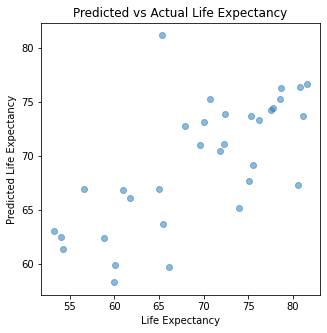

In [52]:
fig, ax = plt.subplots(figsize = (5,5))

scatter = ax.scatter(x = y_test,
                      y = y_test_pred,
                      alpha = 0.5)
ax.set(title = "Predicted vs Actual Life Expectancy", xlabel = "Life Expectancy",ylabel = "Predicted Life Expectancy");

#### Graph below shows the predicted life expectancy and true life expectancy vs BMI

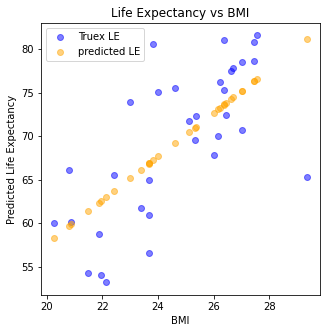

In [55]:
# Display the plot inline
%matplotlib inline

# create subplots
fig, ax = plt.subplots(figsize=(5,5))

# create the 1st scatter plot of x_test and y_test
ax.scatter(x = x_test,y = y_test,label='Truex LE',alpha = 0.5, c='blue')

# create the 2nd scatter plot of x_test and y_test_pred
ax.scatter( x = x_test, y = y_test_pred, c='orange', label='predicted LE', alpha = 0.5)

# set the title of the plot
ax.set(title = "Life Expectancy vs BMI", xlabel = "BMI",ylabel = "Predicted Life Expectancy");

ax.legend();